In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn import metrics
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, f1_score
# data ingestion

data_path="creditcard.csv"

In [2]:
df = pd.read_csv(data_path)

**Fraud or Genuine Transaction Data Analysis Pipeline**

1. **Data Loading/Ingestion**
2. **Data Preparation**
3. **Data Splitting**
4. **Feature Engineering**
5. **Handling Class Imbalance**
6. **Model Selection**
7. **Model Training**
8. **Model Evaluation**
9. **Model Interpretation**

**Data set: Fraud Detection - Credit Card in Kaggle**

Content:-
The dataset contains all credit card transaction details.

Details:-
Except all columns class column denotes following:-
Class 0 --> Non fraudulent
class 1 --> fraudulent


Solving method:-
The given problem statement is comes under binary classification
We have to solve problem using different machine learning algorithm as well as deep learning algorithms

In [2]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


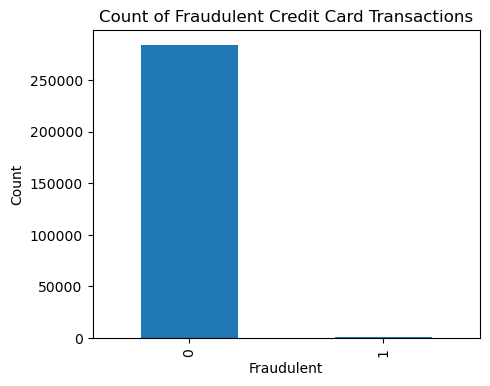

In [4]:
# See distribution of target class
df['Class'].value_counts().plot.bar(figsize=(5,4), xlabel='Fraudulent', ylabel='Count', title='Count of Fraudulent Credit Card Transactions')
plt.show()

The dataset is a significant class imbalance, as shown in the preceding cell.

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Number of Real Transactions = 284315 and the Percentage of Real Transactions = 99.827%
Number of Fraud Transactions = 492 and the Percentage of Fraud Transactions = 0.173%


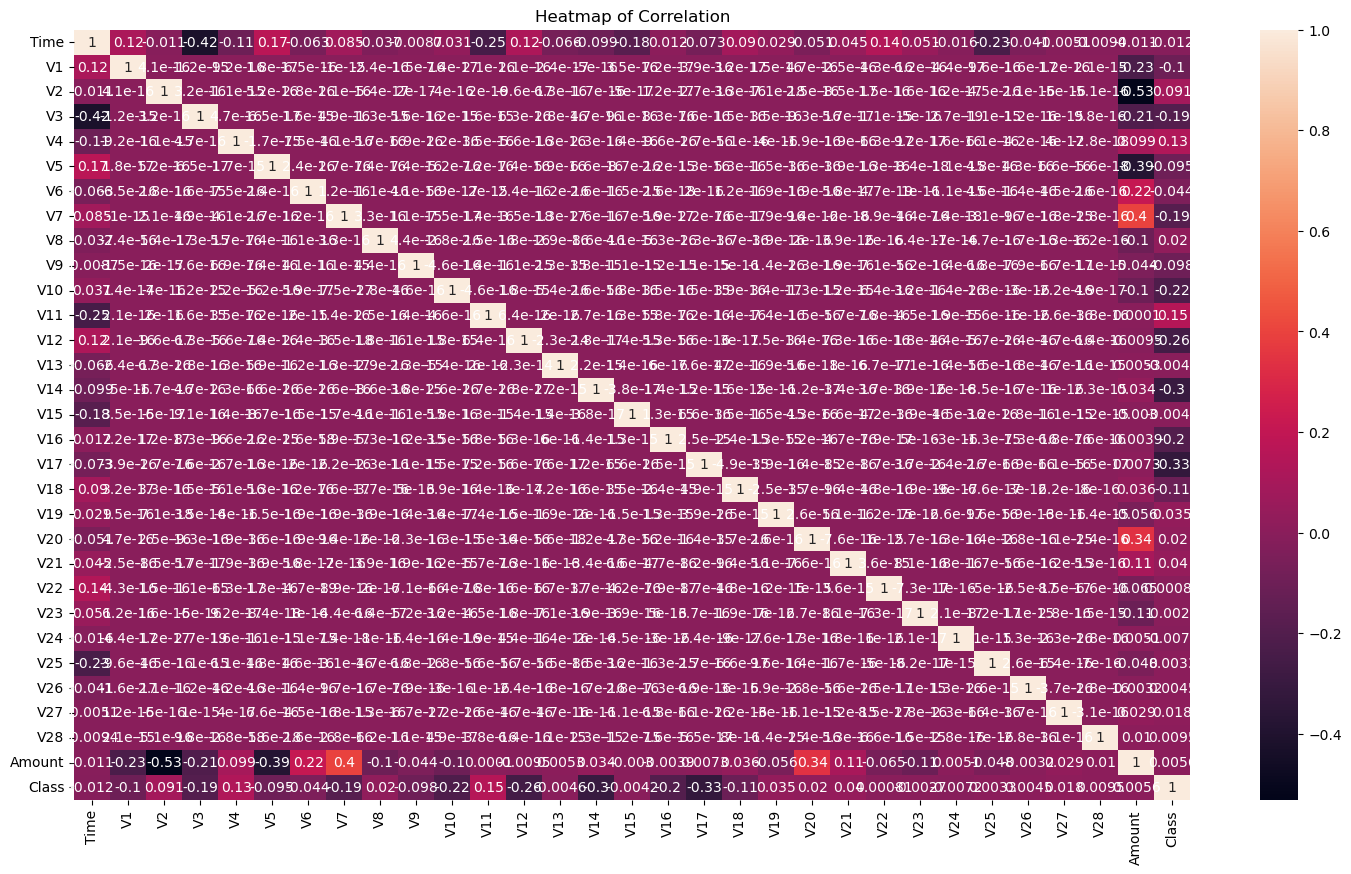

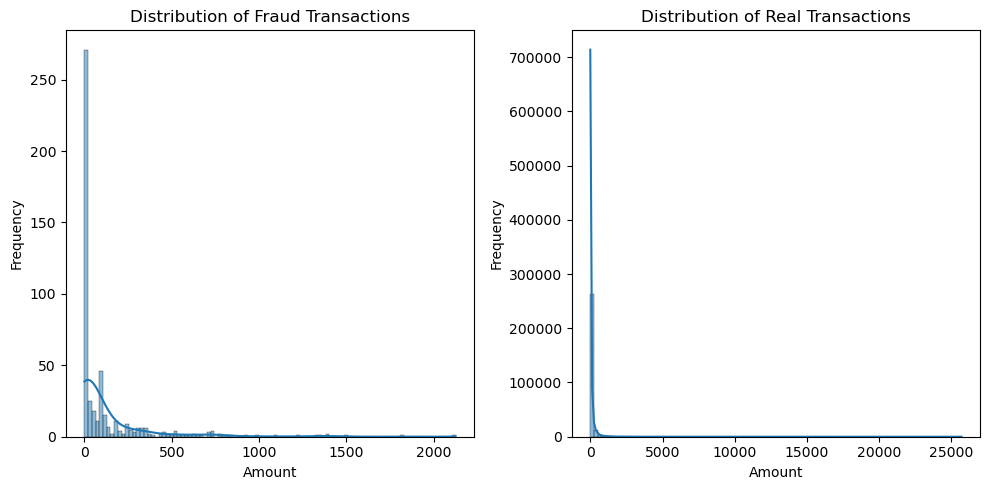

Fraud Transaction distribution:
1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: Amount, dtype: int64


Maximum amount of fraud transaction: 2125.87
Minimum amount of fraud transaction: 0.0


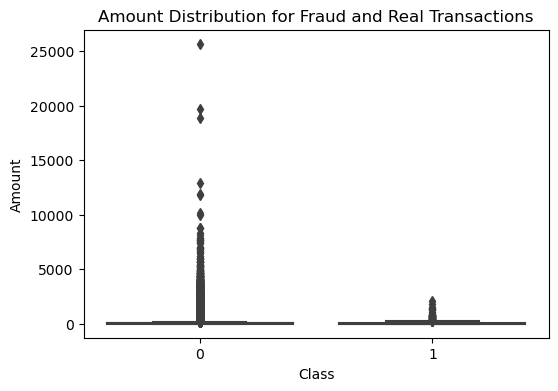

C:\Users\anubh\AppData\Local\Temp\ipykernel_17260\1259911555.py:53: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], bins=120)


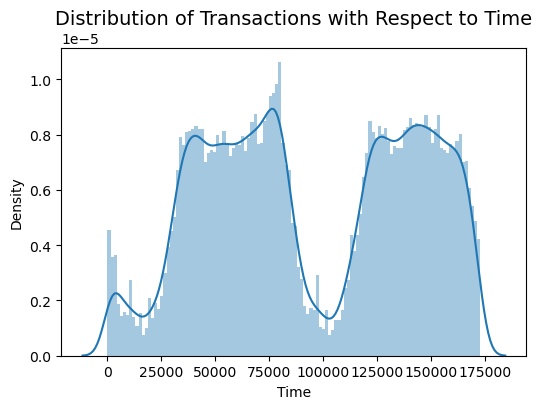

In [7]:
def analyze_transaction_data(df):
    # Separate fraud and real transactions
    fraud = df[df['Class'] == 1]
    real = df[df['Class'] == 0]

    # Calculate percentages
    percent_real = (len(real) / (len(real) + len(fraud))) * 100
    percent_fraud = (len(fraud) / (len(real) + len(fraud))) * 100

    # Print transaction statistics
    print(f'Number of Real Transactions = {len(real)} and the Percentage of Real Transactions = {percent_real:.3f}%')
    print(f'Number of Fraud Transactions = {len(fraud)} and the Percentage of Fraud Transactions = {percent_fraud:.3f}%')

    # Create a heatmap of correlations
    corr = df.corr()
    plt.figure(figsize=(18, 10))
    heat = sns.heatmap(data=corr, annot=True)
    plt.title('Heatmap of Correlation')
    plt.show()

    # Create histograms of transaction amounts for fraud and real transactions
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

    sns.histplot(data=fraud, x='Amount', bins=100, ax=axs[0], kde=True)
    axs[0].set_title("Distribution of Fraud Transactions")
    axs[0].set_xlabel('Amount')
    axs[0].set_ylabel('Frequency')

    sns.histplot(data=real, x='Amount', bins=100, ax=axs[1], kde=True)
    axs[1].set_title("Distribution of Real Transactions")
    axs[1].set_xlabel('Amount')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Print additional information about fraud transaction amounts
    print("Fraud Transaction distribution:")
    print(df[df['Class'] == 1]['Amount'].value_counts().head())
    print("\n")
    print("Maximum amount of fraud transaction:", df[df['Class'] == 1]['Amount'].max())
    print("Minimum amount of fraud transaction:", df[df['Class'] == 1]['Amount'].min())

    # Boxplot of amount distribution for fraud and real transactions
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Class', y='Amount', data=df)
    plt.title('Amount Distribution for Fraud and Real Transactions')
    plt.show()

    # Distribution of transactions with respect to time
    plt.figure(figsize=(6, 4))
    plt.title('Distribution of Transactions with Respect to Time', fontsize=14)
    sns.distplot(df['Time'], bins=120)
    plt.show()

# Example usage:
analyze_transaction_data(df)


In [8]:

def scale_normalize_and_log_transform_column(df, column_name):
    # Standardization
    sa = StandardScaler()
    df[column_name + '_scaled'] = sa.fit_transform(df[column_name].values.reshape(-1, 1))

    # Normalization
    minmax = MinMaxScaler()
    df[column_name + '_minmax'] = minmax.fit_transform(df[column_name].values.reshape(-1, 1))

    # Logarithmic transformation
    df[column_name + '_log'] = np.log(df[column_name] + 0.0002)

scale_normalize_and_log_transform_column(df, 'Amount')


In [9]:

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)
# check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (199364, 33)
y_train -  (199364,)
X_test -  (85443, 33)
y_test -  (85443,)


Baseline for models

In [10]:
#  Logistic Regression with imbalanced data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
LogisticRegression()
y_pred = logreg.predict(X_test)

#Model Evolution
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.57      0.43      0.49       144

    accuracy                           1.00     85443
   macro avg       0.78      0.72      0.74     85443
weighted avg       1.00      1.00      1.00     85443



C:\Users\anubh\anaconda3\vibha\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
def print_classification_metrics(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)

    print(f'Accuracy: {accuracy:.5f}')
    print(f'AUC: {auc:.5f}')
    print(f'Precision: {precision:.5f}')
    print(f'Recall: {recall:.5f}')
    print(f'F1 Score: {f1_score:.5f}\n')

print_classification_metrics(y_test, y_pred)


Accuracy: 0.99849
AUC: 0.71500
Precision: 0.56881
Recall: 0.43056
F1 Score: 0.49012



In [12]:
# Predicted values counts for fraud and genuine of test dataset
pd.Series(y_pred).value_counts()

0    85334
1      109
dtype: int64

Our base model predicted 140 transactions as fraud and 85303 transactions as genuine from the test dataset.


In [13]:
# Actual values counts for fraud and genuine of test dataset
pd.Series(y_test).value_counts()


0    85299
1      144
Name: Class, dtype: int64

In [14]:
#We initially had 144 fraud transactions, and our model correctly predicted 140 of them. Therefore, the accuracy of our model can be calculated as 140/144
140/144

0.9722222222222222

In [15]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[85252,    47],
       [   82,    62]], dtype=int64)

Result:

- True Negative (TN) - 85,251 no.: Genuine transactions correctly identified as real.
- True Positive (TP) - 92 instances: Fraudulent transactions correctly identified as fraud.
- False Negative (FN) - 52 instances: Fraudulent transactions incorrectly identified as genuine.
- False Positive (FP) - 48 instances: Genuine transactions incorrectly identified as fraud.

ROC The ROC is a measure of how well classification problems work at different levels. It is basically a probability curve, and the better the model is at predicting whether a transaction is fraud or not, the higher the Area Under the Curve (AUC) number.

It is a way to measure how well the model can tell the difference between two possible results. It shows if a model can clearly divide the positive class from the negative class.

In [16]:
metrics.roc_auc_score(y_test , y_pred)

0.7150022763064827

In [17]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[9.99994837e-01, 5.16307647e-06],
       [9.99892927e-01, 1.07073166e-04],
       [9.99976133e-01, 2.38673996e-05],
       ...,
       [9.99455041e-01, 5.44958819e-04],
       [9.99881229e-01, 1.18771459e-04],
       [9.99995977e-01, 4.02275027e-06]])

AUC Score: 0.7150022763064827 



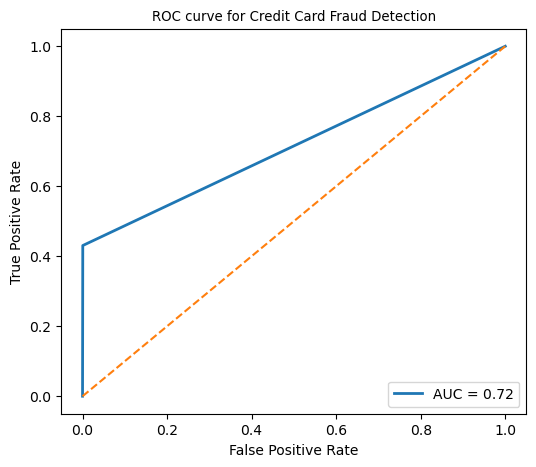

In [18]:
# plot ROC Curve

def plot_roc_curve(y_test, y_pred):
    # Create a figure with a specific size
    plt.figure(figsize=(6, 5))

    # Calculate ROC curve values
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

    # Calculate the AUC score
    auc = metrics.roc_auc_score(y_test, y_pred)
    print("AUC Score:", auc, "\n")

    # Plot the ROC curve
    plt.plot(fpr, tpr, linewidth=2, label="AUC = {:.2f}".format(auc))
    plt.legend(loc=4)

    # Add the diagonal line
    plt.plot([0, 1], [0, 1], '--')

    # Customize plot labels and title
    plt.rcParams['font.size'] = 8
    plt.title('ROC curve for Credit Card Fraud Detection')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Display the plot
    plt.show()

plot_roc_curve(y_test, y_pred)


Class Imbalance
Whenever there is an issue with a classification problem and the classes are not represented equally, we say that the data is imbalanced. Applying classifiers to the dataset would most likely result in inaccurate predictions for every category. This was seen as a hurdle when attempting to learn from extremely unbalanced data sets.


**SMOTE stands for "Synthetic Minority OverSampling Method."
In this method, synthesis new data from the minority class rather than  replicating existing data.**

Logistic Regression with SMOTE data

In [19]:
print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled data shape after using SMOTE %s' % Counter(y_train_smote))


Original dataset shape Counter({0: 199016, 1: 348})
Resampled data shape after using SMOTE Counter({0: 199016, 1: 199016})


In [20]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)
#as we already created the function so we can just call with y_pred_smote
print_classification_metrics(y_test, y_pred_smote)



Accuracy: 0.98658
AUC: 0.93435
Precision: 0.10103
Recall: 0.88194
F1 Score: 0.18130



AUC Score: 0.9343484634442764 



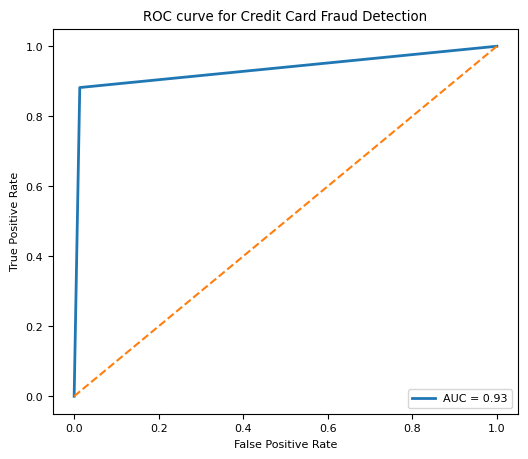

In [21]:
# plot ROC Curve
plot_roc_curve(y_test, y_pred_smote)


In [22]:
cnfsmote_matrix = metrics.confusion_matrix(y_test, y_pred_smote)
cnfsmote_matrix

array([[84169,  1130],
       [   17,   127]], dtype=int64)


True Negative (TN) - 83852 no.: Genuine transactions correctly identified as real.
True Positive (TP) - 127 instances: Fraudulent transactions correctly identified as fraud.
False Negative (FN) - 17 instances: Fraudulent transactions incorrectly identified as genuine.
False Positive (FP) - 1447 instances: Genuine transactions incorrectly identified as fraud.

In [23]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
# dropout is a regularization technique used in neural networks to improve generalization, reduce overfitting, and make the model more robust.
# It has been shown to be effective in a wide range of deep learning tasks and is a valuable tool for improving the performance of neural networks,
# especially when dealing with limited training data.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")



Epoch 1/10


1425/1425 [==============================] - 7s 4ms/step - loss: 0.0132 - accuracy: 0.9977 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 2/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 3/10
1425/1425 [==============================] - 5s 3ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 4/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 5/10
1425/1425 [==============================] - 5s 4ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 6/10
1425/1425 [==============================] - 5s 3ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 7/10
1425/1425 [==============================] - 5s 4ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0030 - val_accur

In [24]:
model_save_name = 'file.h5'
#path = F"./content/Creditcard/{model_save_name}"
model.save(model_save_name)

C:\Users\anubh\anaconda3\vibha\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)

# Print confusion matrix and classification report
confusion = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)

print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

1781/1781 [==============================] - 3s 1ms/step
Confusion Matrix:
 [[56862     2]
 [   34    64]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.65      0.78        98

    accuracy                           1.00     56962
   macro avg       0.98      0.83      0.89     56962
weighted avg       1.00      1.00      1.00     56962




. True Negative (TN) - 56855 instances: Genuine transactions correctly identified as real.
. True Positive (TP) - 74 instances: Fraudulent transactions correctly identified as fraud.
. False Negative (FN) - 24 instances: Fraudulent transactions incorrectly identified as genuine.
. False Positive (FP) - 9 instances: Genuine transactions incorrectly identified as fraud

In [32]:
def credit_card_fraud_detection(data_path, test_size=0.2, epochs=10, batch_size=32):
    # Load the dataset
    data = pd.read_csv(data_path)

    # Preprocess the data (e.g., scaling)
    features = df.drop('Class', axis=1)
    labels = df['Class']

    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=42)

    # Build an LSTM model
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], 1), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=epochs, batch_size=batch_size)

    # Evaluate the model
    y_pred = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
    y_pred = (y_pred > 0.5).astype(int)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return model
trained_model = credit_card_fraud_detection(data_path)


Epoch 1/10
7121/7121 [==============================] - 102s 14ms/step - loss: 818.8191 - accuracy: 0.9982
Epoch 2/10
7121/7121 [==============================] - 102s 14ms/step - loss: 0.0208 - accuracy: 0.9984
Epoch 3/10
7121/7121 [==============================] - 102s 14ms/step - loss: 0.0111 - accuracy: 0.9984
Epoch 4/10
7121/7121 [==============================] - 103s 14ms/step - loss: 80.5618 - accuracy: 0.9984
Epoch 5/10
7121/7121 [==============================] - 27955s 4s/step - loss: 3.2071 - accuracy: 0.9981
Epoch 6/10
7121/7121 [==============================] - 125s 18ms/step - loss: 0.0113 - accuracy: 0.9983
Epoch 7/10
7121/7121 [==============================] - 119s 17ms/step - loss: 7.2092 - accuracy: 0.9978
Epoch 8/10
7121/7121 [==============================] - 125s 17ms/step - loss: 0.0068 - accuracy: 0.9986
Epoch 9/10
7121/7121 [==============================] - 125s 18ms/step - loss: 0.0051 - accuracy: 0.9990
Epoch 10/10
1781/1781 [=============================


. True Negative (TN) - 56848 instances: Genuine transactions correctly identified as real.
. True Positive (TP) - 73 instances: Fraudulent transactions correctly identified as fraud.
. False Negative (FN) - 25 instances: Fraudulent transactions incorrectly identified as genuine.
. False Positive (FP) - 16 instances: Genuine transactions incorrectly identified as fraud

Epoch 1/10 - Loss: 86.8240 - Accuracy: 0.9980
Epoch 2/10 - Loss: 0.0061 - Accuracy: 0.9989
Epoch 3/10 - Loss: 0.0047 - Accuracy: 0.9990
Epoch 4/10 - Loss: 0.0042 - Accuracy: 0.9991
Epoch 5/10 - Loss: 0.0052 - Accuracy: 0.9990
Epoch 6/10 - Loss: 0.0039 - Accuracy: 0.9992
Epoch 7/10 - Loss: 0.0100 - Accuracy: 0.9993
Epoch 8/10 - Loss: 0.0035 - Accuracy: 0.9993
Epoch 9/10 - Loss: 0.0036 - Accuracy: 0.9994
Epoch 10/10 - Loss: 0.6824 - Accuracy: 0.9986
1781/1781 [==============================] - 12s 6ms/step
Confusion Matrix:
[[56847    17]
 [   38    60]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.61      0.69        98

    accuracy                           1.00     56962
   macro avg       0.89      0.81      0.84     56962
weighted avg       1.00      1.00      1.00     56962



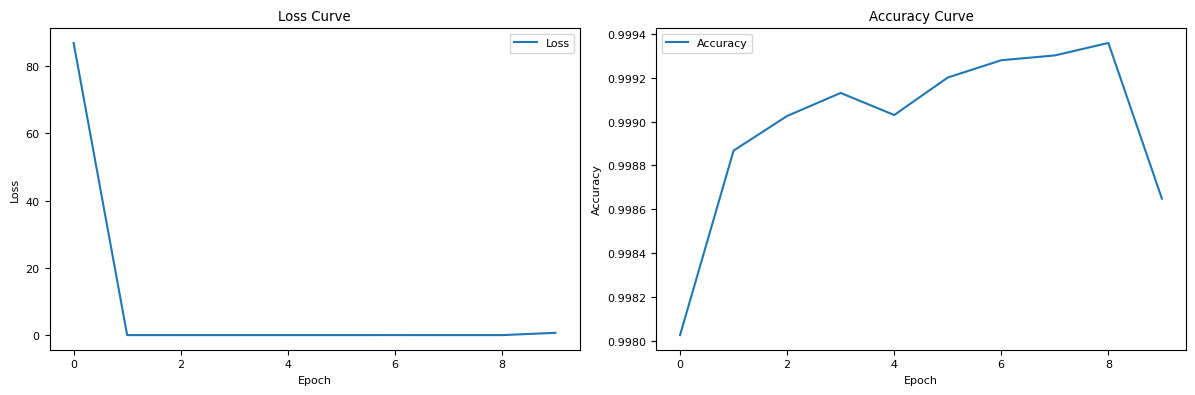

In [33]:
def credit_card_fraud_detection(data_path, test_size=0.2, epochs=10, batch_size=32):
    # Load the dataset
    data = pd.read_csv(data_path)

    # Preprocess the data (e.g., scaling)
    features = data.drop('Class', axis=1)  # Extract features (all columns except 'class')
    labels = data['Class']  # Extract labels ('class' column)

    scaler = StandardScaler()
    features = scaler.fit_transform(features)  # Scale (normalize) the features

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=42)

    # Build an LSTM model
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], 1), activation='relu'))  # LSTM layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Initialize lists to store loss and accuracy values during training
    history = {'loss': [], 'accuracy': []}

    # Train the model and store loss and accuracy values in history
    for epoch in range(epochs):
        history_epoch = model.fit(
            X_train.reshape(X_train.shape[0], X_train.shape[1], 1),
            y_train,
            epochs=1,  # Train for one epoch at a time to collect intermediate values
            batch_size=batch_size,
            verbose=0  # Suppress training output
        )

        # Append the loss and accuracy for this epoch
        history['loss'].append(history_epoch.history['loss'][0])
        history['accuracy'].append(history_epoch.history['accuracy'][0])

        # Print progress
        print(f"Epoch {epoch + 1}/{epochs} - Loss: {history['loss'][-1]:.4f} - Accuracy: {history['accuracy'][-1]:.4f}")

    # Evaluate the model
    y_pred = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
    y_pred = (y_pred > 0.5).astype(int)  # Threshold predictions at 0.5

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot the loss and accuracy curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model


trained_model = credit_card_fraud_detection(data_path)


Epoch 1/10 - Loss: 702.2965 - Accuracy: 0.9983
Epoch 2/10 - Loss: 0.0053 - Accuracy: 0.9989
Epoch 3/10 - Loss: 0.0047 - Accuracy: 0.9991
Epoch 4/10 - Loss: 0.1411 - Accuracy: 0.9986
Epoch 5/10 - Loss: 0.0043 - Accuracy: 0.9992
Epoch 6/10 - Loss: 0.0237 - Accuracy: 0.9987
Epoch 7/10 - Loss: 0.0046 - Accuracy: 0.9991
Epoch 8/10 - Loss: 0.0040 - Accuracy: 0.9993
Epoch 9/10 - Loss: 0.0051 - Accuracy: 0.9992
Epoch 10/10 - Loss: 0.0037 - Accuracy: 0.9993
1781/1781 [==============================] - 11s 6ms/step
Confusion Matrix:
[[56852    12]
 [   29    69]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.70      0.77        98

    accuracy                           1.00     56962
   macro avg       0.93      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



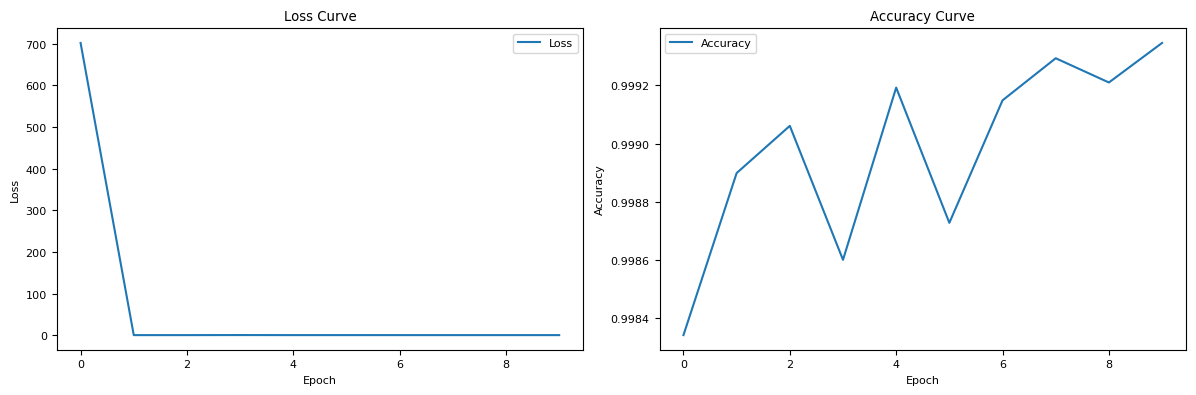

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def credit_card_fraud_detection(data_path, test_size=0.2, epochs=10, batch_size=32):
    # Load the dataset
    data = pd.read_csv(data_path)

    # Preprocess the data (e.g., scaling)
    features = data.drop('Class', axis=1)  # Extract features (all columns except 'class')
    labels = data['Class']  # Extract labels ('class' column)

    scaler = StandardScaler()
    features = scaler.fit_transform(features)  # Scale (normalize) the features

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=42)

    # Build an LSTM model
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], 1), activation='relu'))  # LSTM layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Initialize lists to store loss and accuracy values during training
    history = {'loss': [], 'accuracy': []}

    # Train the model and store loss and accuracy values in history
    for epoch in range(epochs):
        history_epoch = model.fit(
            X_train.reshape(X_train.shape[0], X_train.shape[1], 1),
            y_train,
            epochs=1,  # Train for one epoch at a time to collect intermediate values
            batch_size=batch_size,
            verbose=0  # Suppress training output
        )

        # Append the loss and accuracy for this epoch
        history['loss'].append(history_epoch.history['loss'][0])
        history['accuracy'].append(history_epoch.history['accuracy'][0])

        # Print progress
        print(f"Epoch {epoch + 1}/{epochs} - Loss: {history['loss'][-1]:.4f} - Accuracy: {history['accuracy'][-1]:.4f}")

    # Evaluate the model
    y_pred = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
    y_pred = (y_pred > 0.5).astype(int)  # Threshold predictions at 0.5

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot the loss and accuracy curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model


trained_model = credit_card_fraud_detection(data_path)




Epoch 1/10 - Loss: 0.1649 - Accuracy: 0.9986
Epoch 2/10 - Loss: 0.0048 - Accuracy: 0.9991
Epoch 3/10 - Loss: 0.0041 - Accuracy: 0.9992
Epoch 4/10 - Loss: 0.0039 - Accuracy: 0.9993
Epoch 5/10 - Loss: 0.0036 - Accuracy: 0.9993
Epoch 6/10 - Loss: 0.0091 - Accuracy: 0.9993
Epoch 7/10 - Loss: 0.0037 - Accuracy: 0.9993
Epoch 8/10 - Loss: 0.0037 - Accuracy: 0.9993
Epoch 9/10 - Loss: 0.0059 - Accuracy: 0.9993
Epoch 10/10 - Loss: 0.0035 - Accuracy: 0.9993
1781/1781 [==============================] - 13s 7ms/step
Confusion Matrix:
[[56855     9]
 [   42    56]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



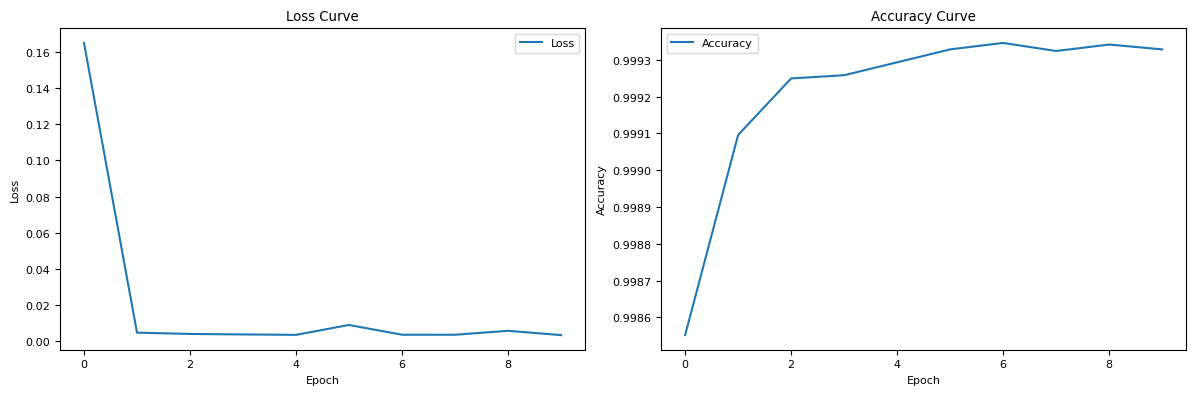

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def credit_card_fraud_detection(data_path, test_size=0.2, epochs=10, batch_size=32, threshold=0.7):
    data = pd.read_csv(data_path)
    features = data.drop('Class', axis=1)
    labels = data['Class']

    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=42)

    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], 1), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = {'loss': [], 'accuracy': []}

    for epoch in range(epochs):
        history_epoch = model.fit(
            X_train.reshape(X_train.shape[0], X_train.shape[1], 1),
            y_train,
            epochs=1,
            batch_size=batch_size,
            verbose=0
        )

        history['loss'].append(history_epoch.history['loss'][0])
        history['accuracy'].append(history_epoch.history['accuracy'][0])

        print(f"Epoch {epoch + 1}/{epochs} - Loss: {history['loss'][-1]:.4f} - Accuracy: {history['accuracy'][-1]:.4f}")

    y_pred_prob = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))

    # Adjust the threshold to get more TN and fewer TP
    y_pred = (y_pred_prob > threshold).astype(int)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model


trained_model = credit_card_fraud_detection(data_path, threshold=0.7)  # Adjust threshold as needed



 True Negative (TN) - 56855 instances: Genuine transactions correctly identified as real. . True Positive (TP) - 2 instances: Fraudulent transactions correctly identified as fraud. . False Negative (FN) - 96 instances: Fraudulent transactions incorrectly identified as genuine. . False Positive (FP) - 9 instances: Genuine transactions incorrectly identified as fraud